<a href="https://colab.research.google.com/github/Haalibrahim/NLP/blob/main/Federal_Soup_Blog_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import plotly.graph_objects as go 

In [2]:
df = pd.read_csv("/content/Federal- Security Clearance summary.csv")

In [3]:
df.head()

,Topics,Replies,Views,Time
0,"Investigation for GS Position\r\nCWOBMF, 4 mon...",1,412,2021
1,"Phone offer, but nothing on paper, yetAccepted...",1,389,2021
2,"Investigator found ""Derogatory Information"" up...",9,1380,2021
3,SF-86: How to list Self-Employment at a DoD Ag...,1,304,2021
4,SOR for Financial DebtHow to respond\r\ngigito...,2,500,2021


In [4]:
!pip install tensorflow tensorflow_hub tensorflow_text

     |████████████████████████████████| 4.9 MB 18.9 MB/s 
     |████████████████████████████████| 462 kB 35.0 MB/s 


In [5]:
sentences = df['Topics'].tolist()

In [6]:
sentences[0]

'Investigation for GS Position\r\nCWOBMF, 4 months ago'

In [7]:
len(sentences)

4845

In [8]:
!pip install bertopic 

     |████████████████████████████████| 58 kB 4.7 MB/s 
     |████████████████████████████████| 79 kB 7.2 MB/s 
     |████████████████████████████████| 5.2 MB 42.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 7.1 MB/s 
     |████████████████████████████████| 4.0 MB 42.3 MB/s 
     |████████████████████████████████| 1.2 MB 53.1 MB/s 
     |████████████████████████████████| 77 kB 6.1 MB/s 
     |████████████████████████████████| 6.6 MB 58.0 MB/s 
     |████████████████████████████████| 636 kB 55.6 MB/s 
     |████████████████████████████████| 880 kB 69.9 MB/s 
     |████████████████████████████████| 1.1 MB 41.2 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2330821 sha256=f6280359fcb216a3ee414aa15b005dacd45274b02a07a23935f4ba625f770f3d
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef

In [9]:
from bertopic import BERTopic 

In [ ]:
topic_model= BERTopic(calculate_probabilities=True)
topics, probabilities = topic_model.fit_transform(sentences)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [14]:
topic_model= BERTopic(min_topic_size= 50, calculate_probabilities=True)
topics, _ = topic_model.fit_transform(sentences)

2022-05-05 15:12:32,613 - BERTopic - Transformed documents to Embeddings
2022-05-05 15:12:47,742 - BERTopic - Reduced dimensionality
2022-05-05 15:12:48,376 - BERTopic - Clustered reduced embeddings


In [15]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,1484,-1_to_2020_clearance_2013
1,0,289,0_sf86_sf85p_sf_86
2,1,268,1_clearance_interim_2013_on
3,2,258,2_employment_employer_job_previous
4,3,232,3_foreign_travel_contacts_national
5,4,205,4_credit_financial_debt_bankruptcy
6,5,201,5_trust_public_risk_moderate
7,6,200,6_adjudication_caf_adjudicators_2013
8,7,199,7_security_clearance_2012_clearancesecurity
9,8,198,8_investigation_background_investigator_invest...


In [17]:
topic_model.get_topic(14)

[('sf86', 0.19699688788035524),
 ('on', 0.04931213133247173),
 ('relatives', 0.03343976401012431),
 ('question', 0.03208506348312905),
 ('and', 0.030696176021652283),
 ('form', 0.028954495765282365),
 ('information', 0.028812111438543984),
 ('section', 0.02771753751194219),
 ('2012', 0.02529876004485625),
 ('2015', 0.0250273649136474)]

In [ ]:
topic_model.get_topic(82)

[('marijuana', 0.20428186994824374),
 ('weed', 0.09557544389538232),
 ('drinking', 0.07261446598310499),
 ('admit', 0.07261446598310499),
 ('use', 0.05286398235034501),
 ('obtain', 0.052031860109729204),
 ('kerath', 0.04076753621771893),
 ('denver', 0.04076753621771893),
 ('gilenhal', 0.04076753621771893),
 ('usesecret', 0.04076753621771893)]

In [ ]:
topic_model.get_topic(80)

[('influence', 0.5403832821345187),
 ('foreign', 0.18212035351414904),
 ('influenceforeign', 0.11484941048348238),
 ('quotbound', 0.11484941048348238),
 ('obligationquot', 0.11484941048348238),
 ('affection', 0.11484941048348238),
 ('create', 0.10661128471957497),
 ('mitigating', 0.07420061700049226),
 ('tssciforeign', 0.06447926646680034),
 ('happypuppy', 0.06447926646680034)]

In [18]:
topic_model.visualize_barchart(top_n_topics=12)

In [ ]:
topic_model.visualize_barchart(top_n_topics=10)

In [19]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_topics()

In [20]:
topic_model.visualize_heatmap()

In [ ]:
topic_model.visualize_heatmap()

In [21]:
topic_model.visualize_hierarchy()

In [ ]:
topic_model.visualize_hierarchy()

In [ ]:
## What if I want to visualize the probability of a document belonging to one of the topics.
topic_model.visualize_distribution(probabilities[10])

In [ ]:
topic_model.visualize_distribution(probabilities[20])

In [ ]:
topic_model.visualize_distribution(probabilities[200])

In [25]:
Time=df['Time']

In [26]:
topics_over_time=topic_model.topics_over_time(docs=sentences,
                                              topics=topics,
                                              timestamps=Time,
                                              global_tuning=True,
                                              evolution_tuning=True,
                                              nr_bins=30)

In [27]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=10)

In [29]:
topic_model.get_representative_docs(topic_model.find_topics('foreign')[0][0])

['German SpouseGerman Spouse\r\nshaynabing, 2020',
 'Foreign Spouse - SF 86Foreign Spouse - SF 86\r\nSidd, 2020',
 'Foreign Fiance\r\nAegius, 2019']

In [30]:
topic_model._sort_mappings_by_frequency

<bound method BERTopic._sort_mappings_by_frequency of <bertopic._bertopic.BERTopic object at 0x7f49b9e3fa90>>

In [31]:
topic_model.get_params()

{'calculate_probabilities': True,
 'diversity': None,
 'embedding_model': <bertopic.backend._sentencetransformers.SentenceTransformerBackend at 0x7f49bbaaa5d0>,
 'hdbscan_model': HDBSCAN(min_cluster_size=50, prediction_data=True),
 'language': 'english',
 'low_memory': False,
 'min_topic_size': 50,
 'n_gram_range': (1, 1),
 'nr_topics': None,
 'seed_topic_list': None,
 'top_n_words': 10,
 'umap_model': UMAP(angular_rp_forest=True, low_memory=False, metric='cosine', min_dist=0.0, n_components=5, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True}),
 'vectorizer_model': CountVectorizer(),
 'verbose': False}

In [32]:
df['Topic'] = df['Topics'].apply(lambda x: topic_model.find_topics(x)[0][0])
df.head()

,Topics,Replies,Views,Time,Topic
0,"Investigation for GS Position\r\nCWOBMF, 4 mon...",1,412,2021,2
1,"Phone offer, but nothing on paper, yetAccepted...",1,389,2021,2
2,"Investigator found ""Derogatory Information"" up...",9,1380,2021,15
3,SF-86: How to list Self-Employment at a DoD Ag...,1,304,2021,2
4,SOR for Financial DebtHow to respond\r\ngigito...,2,500,2021,4


In [35]:
df.to_csv("FederalSoup.csv", encoding='utf-8', index=False)

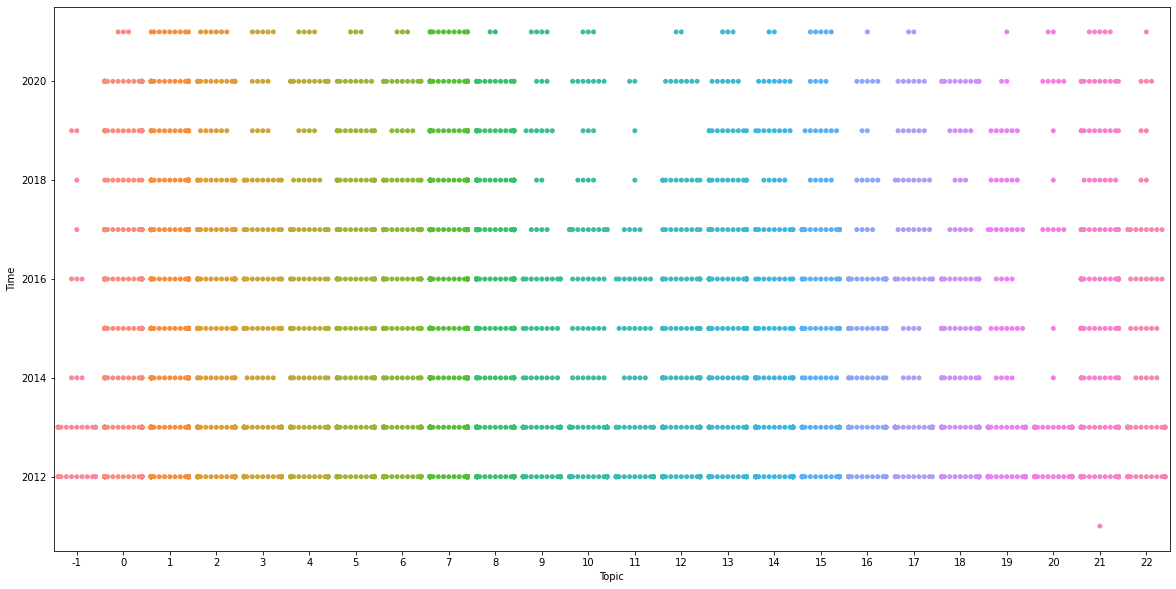

In [38]:
mini_df = df.iloc[:4000]
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
ax = sns.swarmplot(data=mini_df, x='Topic', y='Time');